In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import collections as clt
import matplotlib.pyplot as plt
import pickle
from concepts import Context

In [2]:
plt.rcParams["figure.figsize"] = (10,7) #defining size of plots

In [3]:
df = pd.read_csv('reviews_full_v7.csv')
df.head(5)

,User,Date,Year,Month,Release,Band,Score,Link,Album_link,Review_title,Genre,Text,Sentiment,Band_Genre,Combined_Genre
0,SpookyApparition,July 11 2002,2002,7,Chaosphere,Meshuggah,82,https://www.metal-archives.com/reviews/Meshugg...,https://www.metal-archives.com/albums/Meshugga...,Technical metal at it's finest.,technical thrash metal|math metal|progressive ...,I originally bought Chaosphere in late 2000......,0.9728,groove metal|thrash metal,technical thrash metal|math metal|progressive ...
1,SpookyApparition,July 14 2002,2002,7,Necroticism_-_Descanting_the_Insalubrious,Carcass,88,https://www.metal-archives.com/reviews/Carcass...,https://www.metal-archives.com/albums/Carcass/...,Carcass at their finest.,grindcore|melodic death metal,A midpoint between Carcass' early grind albums...,0.8479,grindcore|death metal,grindcore|melodic death metal
2,MarkRyan,July 15 2002,2002,7,Angels_Fall_First,Nightwish,90,https://www.metal-archives.com/reviews/Nightwi...,https://www.metal-archives.com/albums/Nightwis...,On par with their other stuff...,symphonic power metal,"I'm not hard-core into metal at all, really, b...",0.9951,symphonic metal|power metal,symphonic power metal
3,Fear,July 16 2002,2002,7,Dark_Genesis,Iced_Earth,87,https://www.metal-archives.com/reviews/Iced_Ea...,https://www.metal-archives.com/albums/Iced_Ear...,Brilliance in Repackaging,heavy metal|us power metal,"This is not a new album, but in fact, five alb...",0.9976,thrash metal|power metal,heavy metal|us power metal
4,Esoteric,July 16 2002,2002,7,A_Night_at_the_Opera,Blind_Guardian,70,https://www.metal-archives.com/reviews/Blind_G...,https://www.metal-archives.com/albums/Blind_Gu...,Somewhat Disappointing,power metal,I've been trying for months to come up with an...,0.5494,speed metal|power metal,power metal


In [4]:
def isNan(x):
    return x != x

In [16]:
B = nx.Graph()
mp = clt.Counter(df['User'])
posScore = 75
albums = set()
users = set()
genres = set()
user_list = []
for i,row in df.iterrows():
    album = row['Release'] + 'A' #to differentiate
    user = row['User']
    if row['Score'] >= posScore and mp[user] > 2:
        albums.add(album)
        users.add(user)
        user_list.append(user)
        #B.add_edge(album,user)
        if isNan(row['Combined_Genre']):
            continue
        for genre in row['Combined_Genre'].split('|'):
            genres.add(genre)
            if not B.has_edge(user,genre):
                B.add_edge(user,genre, weight = 1)
            else:
                B[user][genre]['weight'] += 1

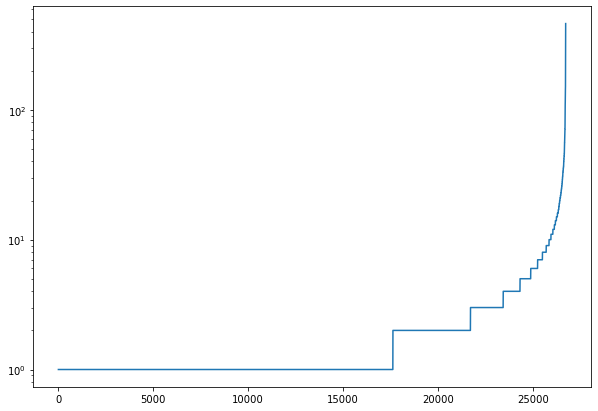

In [17]:
plt.semilogy(sorted(list(nx.get_edge_attributes(B,'weight').values())))

In [18]:
B = nx.Graph(B)
for u,v in B.edges():
    if B[u][v]['weight'] < 4:
        B.remove_edge(u,v)
    
genre_group = pickle.load(open('genre_group.p','rb'))
print(len(genres))

for genre in genres.copy():
    #if node not in genre_group:
        #print(node)
    if genre not in genre_group or genre_group[genre] == 'Non-metal' or genre_group[genre] == 'Others':
        B.remove_node(genre)
        genres.remove(genre)


B = B.subgraph(sorted([(len(cc),cc) for cc in nx.connected_components(B)])[-1][1])
for user in users.copy():
    if not B.has_node(user):
        users.remove(user)
'''for album in albums.copy():
    if not B.has_node(album):
        albums.remove(album)'''
for genre in genres.copy():
    if not B.has_node(genre):
        genres.remove(genre)

284


In [19]:
B.number_of_nodes(), B.number_of_edges(), nx.number_connected_components(B), len(genres), len(users)

(1174, 3057, 1, 91, 1083)

In [24]:
context_df = pd.DataFrame()
contexts = {}
for u,v in B.edges:
    if u not in genres:
        u,v = v,u
    contexts[(u,v)] = B[u][v]['weight']


print(clt.Counter(contexts.values()))

genres = list(genres)
users = list(users)

for genre in genres:
    arr = []
    for user in users:
        if (genre,user) in contexts:
            arr.append('X')
        else:
            arr.append('')
    context_df[genre] = arr

context_df.index = users
context_df.to_csv('contexts_fca.csv')
#context_df.to_csv('contexts_fca.csv')
context_df

Counter({4: 817, 5: 517, 6: 329, 7: 233, 8: 182, 9: 140, 11: 96, 10: 95, 12: 76, 13: 53, 14: 52, 15: 49, 16: 44, 17: 25, 21: 24, 19: 22, 22: 21, 18: 19, 20: 15, 23: 15, 24: 14, 26: 13, 25: 13, 31: 11, 27: 10, 29: 8, 34: 8, 36: 8, 35: 8, 28: 8, 37: 8, 30: 7, 32: 6, 43: 6, 45: 5, 40: 5, 42: 5, 33: 5, 63: 4, 44: 4, 126: 3, 46: 3, 53: 3, 71: 3, 39: 3, 38: 3, 57: 2, 56: 2, 54: 2, 69: 2, 41: 2, 68: 2, 111: 2, 47: 2, 55: 2, 59: 2, 95: 1, 87: 1, 139: 1, 49: 1, 77: 1, 88: 1, 191: 1, 58: 1, 51: 1, 148: 1, 395: 1, 383: 1, 223: 1, 70: 1, 377: 1, 52: 1, 83: 1, 115: 1, 91: 1, 99: 1, 246: 1, 461: 1, 65: 1, 67: 1, 135: 1, 104: 1, 105: 1, 349: 1, 363: 1, 136: 1, 66: 1, 89: 1, 110: 1, 145: 1, 128: 1, 151: 1, 164: 1, 144: 1, 48: 1})


,technical thrash metal,progressive hard rock,melodic power metal,blackened folk metal,melodic metalcore,black doom metal,progressive power metal,electro industrial metal,blackened speed metal,atmospheric black metal,...,blackened thrash metal,bay area thrash metal,blackened doom metal,industrial death metal,symphonic doom metal,progressive black metal,melodic death metal,teutonic thrash metal,folk metal,psychedelic doom metal
mjollnir,,,,,,,,,,,...,,,,,,X,X,,X,
Autumn_aurorA,,,,,,,,,,,...,,,,,,,,,,
ozzeh,,,,,,,,,,,...,,,,,,,X,,,
marienbad,,,,,,,,,,,...,,,,,,,,,,
Oscar1989,,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lord_weballergy,,,,,,,,,,,...,,,,,,,,,,
dalecooper,,,,,,,,,,,...,,,,,,,,,,
Roswell47,,,,,,,,,,,...,,,,,,,,,,
nightzblood,,,,,,,,,,,...,,,,,,,,,,


In [25]:
c = Context.fromfile('contexts_fca.csv', frmat = 'csv')
l = c.lattice

In [34]:
x, y = l[1000]
print(x,y)

('autothrall', 'CHRISTI_NS_ANITY8', 'hells_unicorn', 'UltraBoris', 'Gutterscream', 'gasmask_colostomy') ('heavy metal', 'black metal', 'death metal', 'doom metal', 'power metal', 'thrash metal', 'teutonic thrash metal')


In [32]:
concept_list = [(x,y) for x,y in l]
pickle.dump(concept_list, open('concept_list.p','wb'))

In [36]:
f = open('concept_pairs.txt','w')
for x,y in concept_list:
    f.write(str(x) + '\n' + str(y) + '\n\n')
f.close()

In [42]:
len(set(df['User']))

9317

In [43]:
len(genre_group)

298